# **Compile Training Set**

In [4]:
import pandas as pd
from datetime import *

In [41]:
import sys
sys.path.insert(1, '../Scripts') #path

from schedule_to_slugs import *
from game_match import *

In [67]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
encoded_box_scores = pd.read_csv('../Resources/encoded_box_scores.csv')
advanced_stats = pd.read_csv('../Resources/adv_stats_all_slug.csv')
usage_stats = pd.read_csv('../Resources/all_usage_clean.csv')

In [109]:
encoded_box_scores.columns

Index(['Unnamed: 0', 'slug', 'name', 'Team', 'Location', 'Opponent', 'Outcome',
       'seconds_played', 'made_field_goals', 'attempted_field_goals',
       'made_three_point_field_goals', 'attempted_three_point_field_goals',
       'made_free_throws', 'attempted_free_throws', 'offensive_rebounds',
       'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'game_score', 'date', 'game_id', 'spread'],
      dtype='object')

In [110]:
head_to_head_cols = ['seconds_played', 'made_field_goals', 'attempted_field_goals',
       'made_three_point_field_goals', 'attempted_three_point_field_goals',
       'made_free_throws', 'attempted_free_throws', 'offensive_rebounds',
       'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'game_score']
len(head_to_head_cols)

15

## Function to convert date to past season's year

In [38]:
def date_to_season(date):
    date = pd.to_datetime(date)
    if date.month <7:
        return date.year-1
    else:
        return date.year

In [40]:
date_to_season('2014-12-01')

2014

## Making the target vector

In [36]:
set1 = [i for i in range(7400,7800)]
print(set1[0])
print(set1[-1])
set2 = [i for i in range(7882,9112)]
print(set2[0])
print(set2[-1])
set3 = [i for i in range(9215,9913)]
print(set3[0])
print(set3[-1])


7400
7799
7882
9111
9215
9912


In [37]:
game_ids = set1+set2+set3
print(game_ids[0],game_ids[400],game_ids[-1])

7400 7882 9912


In [43]:
len(game_ids)

2328

In [212]:
schedule_lineup[schedule_lineup.game_id==7401]

,Unnamed: 0,date,Team,Player1,Player2,Player3,Player4,Player5,game_id,Location,Outcome,spread
13051,14021,2018-02-11,TOR,O. Anunoby,D. DeRozan,S. Ibaka,K. Lowry,J. Valančiūnas,7401,AWAY,WIN,20.0
13055,17152,2018-02-11,CHO,N. Batum,D. Howard,M. Kidd-Gilchrist,K. Walker,M. Williams,7401,HOME,LOSS,20.0


In [197]:
def outcome_finder(game_id):
    outcome = schedule_lineup[(schedule_lineup.game_id==game_id) & (schedule_lineup.Location=='HOME')].iat[0,10]
    return outcome

In [198]:
outcome_finder(3803)

'WIN'

In [209]:
outcomes = [outcome_finder(game_id) for game_id in game_ids]

In [210]:
target_df = pd.DataFrame(list(zip(game_ids,outcomes)), columns=['game_id','outcomes'])
target_df.head(2)

,game_id,outcomes
0,7400,LOSS
1,7401,LOSS


In [213]:
target_df.to_csv('../Resources/training_data_target.csv')

# Get ```adv_stats``` 

In [42]:
lineups = [home_lineup_slugs(game_id) for game_id in game_ids]

In [44]:
len(lineups)

2328

In [45]:
lineups[:3]

[['bendedr01', 'danietr01', 'jacksjo02', 'paytoel01', 'warretj01'],
 ['batumni01', 'howardw01', 'kiddgmi01', 'walkeke02', 'willima02'],
 ['bazemke01', 'dedmode01', 'ilyaser01', 'schrode01', 'princta02']]

In [46]:
home_lineup_slugs(7400)

['bendedr01', 'danietr01', 'jacksjo02', 'paytoel01', 'warretj01']

In [47]:
flattened_lineups = [y for x in lineups for y in x]
#y for x in list_of_lists for y in x

In [48]:
flattened_lineups[:15]

['bendedr01',
 'danietr01',
 'jacksjo02',
 'paytoel01',
 'warretj01',
 'batumni01',
 'howardw01',
 'kiddgmi01',
 'walkeke02',
 'willima02',
 'bazemke01',
 'dedmode01',
 'ilyaser01',
 'schrode01',
 'princta02']

In [49]:
len(flattened_lineups)

11640

In [59]:
dates_of_games = [get_date(game_id) for game_id in game_ids]

In [79]:
season_year = [date_to_season(date) for date in dates_of_games]

In [80]:
from itertools import repeat

In [82]:
season_year_expanded = [x for year in season_year for x in repeat(year, 5)]

In [84]:
len(season_year_expanded)

11640

In [91]:
players_years = pd.DataFrame(list(zip(flattened_lineups,season_year_expanded)), columns = ['slug','Year'])

In [92]:
players_years.head()

,slug,Year
0,bendedr01,2017
1,danietr01,2017
2,jacksjo02,2017
3,paytoel01,2017
4,warretj01,2017


In [94]:
advanced_stats.head(2)

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,BPM,VORP,Year,slug
0,0,Quincy Acy,PF,22,TOR,29,342,15.9,0.632,0.027,...,14.7,0.7,0.4,1.1,0.157,-0.6,0.7,0.2,2013,acyqu01
1,1,Jeff Adrien,PF,26,CHA,52,713,13.4,0.493,0.012,...,15.6,0.5,0.4,1.0,0.064,-3.0,-3.3,-0.2,2013,adrieje01


In [96]:
adv_stats = advanced_stats.copy()
adv_stats = adv_stats.drop(adv_stats.columns[:3],axis=1)

In [98]:
adv_stats.drop(columns = ['Tm'], inplace= True)

In [99]:
advanced_stats_lineup = pd.merge(players_years,adv_stats,on=['slug','Year'], how='left')
print(len(advanced_stats_lineup))
advanced_stats_lineup.head()

11640


,slug,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,BPM,VORP
0,bendedr01,2017,19.0,43.0,574.0,5.3,0.440,0.627,0.068,4.2,...,3.1,16.2,14.4,-0.7,0.3,-0.3,-0.029,-4.0,-4.3,-0.3
1,danietr01,2017,25.0,67.0,1183.0,10.4,0.531,0.717,0.109,2.1,...,0.3,8.0,21.7,0.5,0.8,1.3,0.051,0.4,-3.1,-0.3
2,jacksjo02,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,paytoel01,2017,22.0,82.0,2412.0,17.2,0.520,0.160,0.231,3.9,...,1.3,15.0,21.6,2.4,2.0,4.4,0.088,0.7,0.9,1.7
4,warretj01,2017,23.0,66.0,2048.0,15.6,0.539,0.120,0.189,6.5,...,1.5,6.1,19.2,3.0,1.1,4.1,0.096,0.2,-0.3,0.9


In [116]:
advanced_stats.fillna(0,inplace=True)

# Get ```all_usage_clean```

In [103]:
usage_stats.drop(usage_stats.columns[0], axis=1,inplace=True)

In [105]:
usage_stats.drop(columns=['stats_id','player','number'], inplace=True)

In [107]:
players_years.columns = ['slug','year']

In [106]:
usage_stats.head()

,GP,MIN,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,%FTA,%OREB,...,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS,year,slug
0,9.0,144.0,13.9,14.4,15.7,25.0,31.3,3.6,5.3,3.6,...,13.8,14.8,18.5,0.0,11.1,15.3,0.0,13.4,2002,jacksja02
1,10.0,126.0,19.9,17.3,21.7,57.9,56.4,3.4,4.9,2.7,...,35.3,34.4,36.0,0.0,0.0,14.0,0.0,17.2,2003,hardati02
2,68.0,1022.0,18.7,20.3,19.3,0.0,2.6,21.1,21.9,36.6,...,10.2,18.9,9.2,16.8,35.3,26.2,0.0,19.6,2004,trentga02
3,18.0,261.0,16.3,12.2,17.8,26.3,36.4,14.2,12.2,11.4,...,23.1,13.7,17.1,0.0,7.7,16.3,0.0,13.2,2004,ricegl02
4,9.0,158.0,26.4,30.9,28.9,11.8,13.0,33.3,29.5,9.3,...,13.1,14.3,18.2,13.0,31.8,26.4,0.0,30.3,2005,robingl02


In [108]:
usage_lineup = pd.merge(players_years,usage_stats, on=['slug','year'], how='left')
len(usage_lineup)
usage_lineup.head()

,slug,year,GP,MIN,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,...,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS
0,bendedr01,2017,43.0,574.0,14.5,12.3,15.6,27.2,32.9,1.8,...,20.3,19.4,10.5,18.2,11.9,36.7,4.2,22.8,6.2,11.6
1,danietr01,2017,67.0,1183.0,20.3,20.7,23.4,50.4,45.8,9.5,...,9.9,9.3,8.9,13.8,11.0,4.1,10.8,15.5,12.5,21.9
2,jacksjo02,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,paytoel01,2017,82.0,2412.0,21.1,21.1,20.5,10.1,12.3,18.2,...,17.5,17.4,45.1,28.8,23.8,15.5,36.2,18.6,20.9,19.8
4,warretj01,2017,66.0,2048.0,18.8,23.2,21.3,9.2,10.9,13.1,...,15.3,17.7,8.9,9.2,21.7,18.8,17.1,16.9,12.6,20.4


In [118]:
usage_lineup.fillna(0, inplace=True)

# Get ```game_match``` stats

In [17]:
part_1 = pd.read_csv('../Resources/games_7400_7799.csv')
part_2 = pd.read_csv('../Resources/games_7882_7899.csv')
part_3 = pd.read_csv('../Resources/games_7900-8399.csv')
part_4 = pd.read_csv('../Resources/games_8400_8899.csv')
part_5 = pd.read_csv('../Resources/games_8900_9111.csv')
part_6 = pd.read_csv('../Resources/games_9215_9912.csv')

In [22]:
part_1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,997.750000,1.0,3.250000,1.000000,2.75,0.0,0.000000,0.250000,2.5,...,1.000000,2.0,1.825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,786.400000,1.6,3.200000,1.400000,3.00,0.0,0.000000,0.000000,0.8,...,0.600000,1.4,2.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1167.000000,6.0,8.500000,1.500000,3.00,1.5,2.000000,0.000000,1.5,...,1.500000,2.0,10.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1743.333333,5.0,12.333333,0.666667,2.00,2.0,3.333333,0.666667,2.0,...,2.666667,1.0,9.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1752.200000,6.0,14.000000,0.600000,1.80,2.0,2.600000,1.800000,2.6,...,0.800000,2.4,10.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
head_to_head = pd.concat([part_1,part_2,part_3,part_4,part_5,part_6],axis='rows').reset_index()

In [20]:
head_to_head2 = pd.concat([part_1,part_2,part_3,part_4,part_5,part_6],axis='rows').reset_index()

In [137]:
head_to_head.drop(head_to_head.columns[:2],axis=1, inplace=True)
head_to_head.dropna(axis=1, how='all', inplace=True)

In [138]:
len(head_to_head)/5

2328.0

In [145]:
head_to_head.index = flattened_lineups

In [139]:
head_to_head.fillna(0, inplace=True)

In [140]:
head_to_head.columns = head_to_head_cols

In [146]:
head_to_head.head()

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
bendedr01,997.750000,1.0,3.250000,1.000000,2.75,0.0,0.000000,0.250000,2.5,2.000000,0.000000,0.25,1.000000,2.0,1.825
danietr01,786.400000,1.6,3.200000,1.400000,3.00,0.0,0.000000,0.000000,0.8,0.400000,0.000000,0.00,0.600000,1.4,2.360
jacksjo02,1167.000000,6.0,8.500000,1.500000,3.00,1.5,2.000000,0.000000,1.5,1.000000,0.500000,0.00,1.500000,2.0,10.600
paytoel01,1743.333333,5.0,12.333333,0.666667,2.00,2.0,3.333333,0.666667,2.0,7.666667,0.333333,0.00,2.666667,1.0,9.200
warretj01,1752.200000,6.0,14.000000,0.600000,1.80,2.0,2.600000,1.800000,2.6,1.200000,1.600000,0.60,0.800000,2.4,10.100


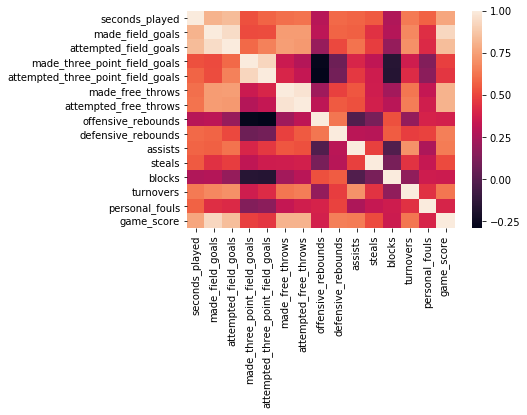

In [141]:
correlation = head_to_head.corr()
heatmap_fig = plt.figure()
heatmap = sns.heatmap(correlation)
#    plt.close(heatmap_fig)

In [121]:
print(len(advanced_stats_lineup),len(usage_lineup),len(head_to_head))

11640 11640 11640


In [142]:
print(advanced_stats_lineup.shape,usage_lineup.shape,head_to_head.shape)

(11640, 24) (11640, 22) (11640, 15)


In [126]:
training_features = pd.concat([advanced_stats_lineup,usage_lineup], axis='columns')
print(len(training_features))
print(training_features.shape)
training_features.head(2)

11640
(11640, 46)


,slug,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS
0,bendedr01,2017,19.0,43.0,574.0,5.3,0.440,0.627,0.068,4.2,...,20.3,19.4,10.5,18.2,11.9,36.7,4.2,22.8,6.2,11.6
1,danietr01,2017,25.0,67.0,1183.0,10.4,0.531,0.717,0.109,2.1,...,9.9,9.3,8.9,13.8,11.0,4.1,10.8,15.5,12.5,21.9


In [143]:
more_training_features = pd.concat([training_features,head_to_head], axis='columns')
print(more_training_features.shape)
more_training_features.head(2)

(11640, 61)


,slug,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
0,bendedr01,2017,19.0,43.0,574.0,5.3,0.440,0.627,0.068,4.2,...,0.0,0.0,0.25,2.5,2.0,0.0,0.25,1.0,2.0,1.825
1,danietr01,2017,25.0,67.0,1183.0,10.4,0.531,0.717,0.109,2.1,...,0.0,0.0,0.00,0.8,0.4,0.0,0.00,0.6,1.4,2.360


In [147]:
training_set_features = more_training_features.copy()

In [150]:
training_set_features.columns

Index(['slug', 'Year', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'BPM', 'VORP', 'slug', 'year', 'GP', 'MIN',
       'USG%', '%FGM', '%FGA', '%3PM', '%3PA', '%FTM', '%FTA', '%OREB',
       '%DREB', '%REB', '%AST', '%TOV', '%STL', '%BLK', '%BLKA', '%PF', '%PFD',
       '%PTS', 'seconds_played', 'made_field_goals', 'attempted_field_goals',
       'made_three_point_field_goals', 'attempted_three_point_field_goals',
       'made_free_throws', 'attempted_free_throws', 'offensive_rebounds',
       'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'game_score'],
      dtype='object')

In [152]:
training_set_features.drop(columns = ['slug','year','slug','Year'], inplace=True)

In [188]:
training_cols = ['Age',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USGA%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'BPM',
 'VORP',
 'GP',
 'MIN',
 'USG%',
 '%FGM',
 '%FGA',
 '%3PM',
 '%3PA',
 '%FTM',
 '%FTA',
 '%OREB',
 '%DREB',
 '%REB',
 '%AST',
 '%TOV',
 '%STL',
 '%BLK',
 '%BLKA',
 '%PF',
 '%PFD',
 '%PTS',
 'seconds_played',
 'made_field_goals',
 'attempted_field_goals',
 'made_three_point_field_goals',
 'attempted_three_point_field_goals',
 'made_free_throws',
 'attempted_free_throws',
 'offensive_rebounds',
 'defensive_rebounds',
 'assists',
 'steals',
 'blocks',
 'turnovers',
 'personal_fouls',
 'game_score']

In [189]:
training_set_features.columns = training_cols
correlations = training_set_features.corr()

In [176]:
def find_correlations(df):
    for col in list(df.columns):
        if len(df[df[col]>.9]) >1:
            print(f'{col} has {len(df[df[col]>.9]-1)} highly correlated features.')
            
        else:
            continue

In [190]:
find_correlations(correlations)

DRB% has 2 highly correlated features.
TRB% has 2 highly correlated features.
OWS has 2 highly correlated features.
WS has 3 highly correlated features.
BPM has 2 highly correlated features.
VORP has 3 highly correlated features.
GP has 2 highly correlated features.
MIN has 2 highly correlated features.
USG% has 5 highly correlated features.
%FGM has 4 highly correlated features.
%FGA has 4 highly correlated features.
%3PM has 2 highly correlated features.
%3PA has 2 highly correlated features.
%FTM has 3 highly correlated features.
%FTA has 3 highly correlated features.
%DREB has 2 highly correlated features.
%REB has 2 highly correlated features.
%TOV has 2 highly correlated features.
%PFD has 3 highly correlated features.
%PTS has 4 highly correlated features.
made_field_goals has 3 highly correlated features.
attempted_field_goals has 2 highly correlated features.
made_three_point_field_goals has 2 highly correlated features.
attempted_three_point_field_goals has 2 highly correlate

In [194]:
correlations[correlations['USG%'] >.9]['USG%']

USG%    1.000000
%FGM    0.975557
%FGA    0.993574
%TOV    0.909795
%PTS    0.985690
Name: USG%, dtype: float64

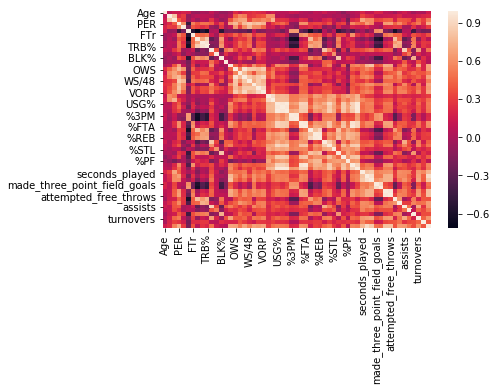

In [153]:
correlation = training_set_features.corr()
heatmap_fig = plt.figure()
heatmap = sns.heatmap(correlation)

In [195]:
training_set_features.to_csv('../Resources/training_data_features.csv')